In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

### Reading Developers Survey Data

In [4]:
df = pd.read_csv('survey_results_public.csv')

In [8]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [9]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [10]:
df.shape

(64461, 61)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

### Job Satisfaction 

In [19]:
df.JobSat.value_counts(normalize= True)

Very satisfied                        0.323295
Slightly satisfied                    0.308227
Slightly dissatisfied                 0.157632
Neither satisfied nor dissatisfied    0.127959
Very dissatisfied                     0.082887
Name: JobSat, dtype: float64

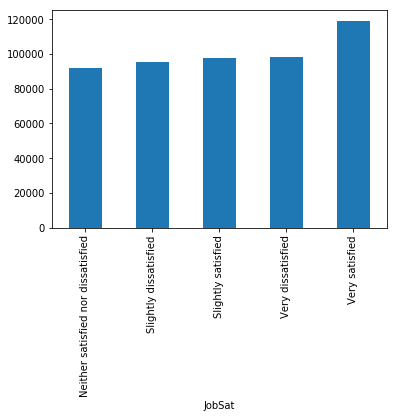

In [35]:
df.groupby('JobSat')['ConvertedComp'].mean().plot(kind = 'bar');

In [37]:
df.groupby('JobSat')['WorkWeekHrs'].mean()

JobSat
Neither satisfied nor dissatisfied    40.205566
Slightly dissatisfied                 40.699093
Slightly satisfied                    40.606345
Very dissatisfied                     41.320876
Very satisfied                        41.075520
Name: WorkWeekHrs, dtype: float64

In [45]:
df_sub1 = df[['JobSat' , 'JobSeek' , 'ConvertedComp' , 'WorkWeekHrs']].dropna(how = 'any' , axis = 0)

In [52]:
df_sub1.JobSeek.value_counts(normalize = True)

I’m not actively looking, but I am open to new opportunities    0.593296
I am not interested in new job opportunities                    0.277268
I am actively looking for a job                                 0.129436
Name: JobSeek, dtype: float64

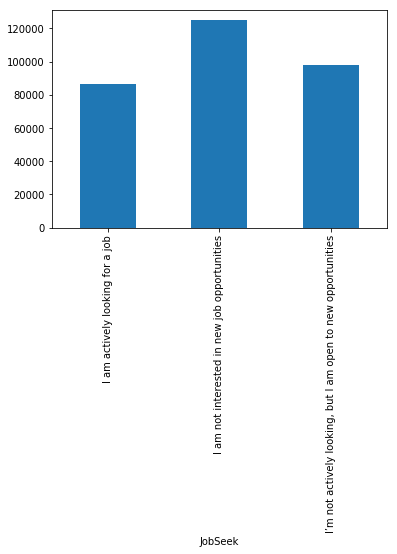

In [49]:
df_sub1.groupby('JobSeek')['ConvertedComp'].mean().plot(kind = 'bar');

In [53]:
df_sub1.groupby('JobSeek')['WorkWeekHrs'].mean()

JobSeek
I am actively looking for a job                                 40.240859
I am not interested in new job opportunities                    41.228624
I’m not actively looking, but I am open to new opportunities    40.642162
Name: WorkWeekHrs, dtype: float64

In [64]:
pd.crosstab(df_sub1.JobSat, df_sub1.JobSeek , normalize   = 'index') *100

JobSeek,I am actively looking for a job,I am not interested in new job opportunities,"I’m not actively looking, but I am open to new opportunities"
JobSat,,,
Neither satisfied nor dissatisfied,18.641846,10.015732,71.342423
Slightly dissatisfied,26.019382,7.185957,66.794661
Slightly satisfied,8.651872,20.265911,71.082217
Very dissatisfied,33.776596,24.848024,41.375380
Very satisfied,3.344697,52.031696,44.623606


In [66]:
pd.crosstab(df_sub1.JobSat, df_sub1.JobSeek , normalize   = 'columns') *100

JobSeek,I am actively looking for a job,I am not interested in new job opportunities,"I’m not actively looking, but I am open to new opportunities"
JobSat,,,
Neither satisfied nor dissatisfied,16.647155,4.175320,13.898963
Slightly dissatisfied,33.317724,4.295551,18.659652
Slightly satisfied,20.721143,22.658214,37.140522
Very dissatisfied,20.814797,7.148322,5.562650
Very satisfied,8.499181,61.722593,24.738213
